<a href="https://colab.research.google.com/github/gowtham140404/AerogelSynthesis/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
!pip install quandl  # Correct the package name to "quandl"

import quandl

quandl

<module 'quandl' from '/usr/local/lib/python3.10/dist-packages/quandl/__init__.py'>

In [50]:
data=quandl.get("NSE/TATAMOTORS")

In [51]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2003-12-26,435.80,440.50,431.65,438.85,438.60,1534637.0,6714.66
2003-12-29,441.00,449.70,441.00,448.40,447.80,2125952.0,9497.72
2003-12-30,450.00,451.90,430.10,444.85,442.40,2683293.0,11894.85
2003-12-31,446.00,459.30,443.55,452.10,452.05,4311596.0,19551.42
2004-01-01,453.25,457.90,451.50,454.00,454.45,2077604.0,9457.51
2004-01-02,458.00,460.35,454.05,457.95,456.40,1704790.0,7795.88
2004-01-05,458.00,465.00,450.60,451.50,454.85,2141245.0,9767.85
2004-01-06,460.00,465.00,448.50,450.25,454.45,2360145.0,10850.57
2004-01-07,451.40,454.70,438.10,447.95,446.45,3766229.0,16707.04


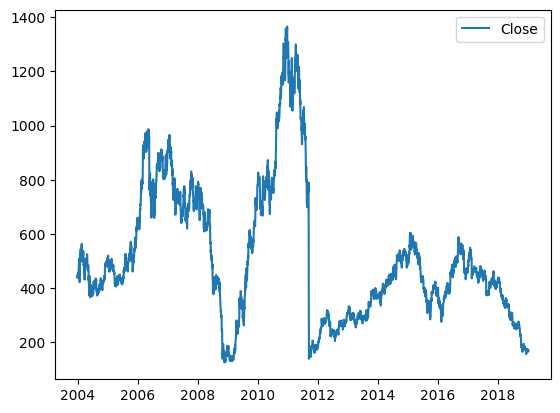

In [52]:
plt.figure()
plt.plot(data['Close'], label='Close')  # Update the column name
plt.legend()
plt.show()


In [53]:
data['open-close']= data['Open']-data['Close']
data['high-low']= data['High']-data['Low']
x=data[['open-close','high-low']]
y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)
display(x)
display(y)

,open-close,high-low
Date,,
2003-12-26,-2.80,8.85
2003-12-29,-6.80,8.70
2003-12-30,7.60,21.80
2003-12-31,-6.05,15.75
2004-01-01,-1.20,6.40
...,...,...
2018-12-31,-0.25,2.15
2019-01-01,0.05,2.90
2019-01-02,2.05,3.75


array([ 1, -1,  1, ..., -1,  1, -1])

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state= 44)


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

params= {'n_neighbors':[2,3,4,5,6,7,8,9]}  # Fix the typo here
knn= neighbors.KNeighborsClassifier()
model= GridSearchCV(knn,params,cv=5)
model.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [56]:
accuracy_train=accuracy_score(y_train,model.predict(x_train))
accuracy_test=accuracy_score(y_test,model.predict(x_test))

In [57]:
print ('Train accuracy result:%2f' %accuracy_train)
print ('Train accuracy result:%2f' %accuracy_train)

Train accuracy result:0.758929
Train accuracy result:0.758929


In [58]:
actual_predicted_result=pd.DataFrame({'actual':y_test,'predicted':model.predict(x_test)})
actual_predicted_result

,actual,predicted
0,-1,1
1,1,1
2,1,-1
3,1,1
4,-1,-1
...,...,...
929,-1,1
930,-1,-1
931,1,-1
932,1,-1


In [68]:
Y=data['Close']

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.25,random_state= 44)

In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

params= {'n_neighbors':[2,3,4,5,6,7,8,9]}  # Fix the typo here
knn= neighbors.KNeighborsRegressor()
model= GridSearchCV(knn,params,cv=5)
model.fit(x_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [79]:
Y_pred=model.predict(x_test)
# Y_test = Y_test.values.reshape(-1, 1)  # Remove this line, it's not needed
Y_pred = Y_pred.reshape(-1, 1)          # Y_pred likely already a NumPy array

# Concatenate the two arrays side by side
result = np.hstack((Y_test, Y_pred))
result

array([[406.7       , 456.83888889],
       [133.3       , 384.        ],
       [693.3       , 789.47222222],
       ...,
       [421.9       , 331.67222222],
       [525.75      , 512.98333333],
       [507.55      , 465.93333333]])